In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [17]:
import splitfolders
input_folder = 'data'
output_folder = 'output'
splitfolders.ratio(input_folder, output_folder, seed=1337, ratio=(.8,0.1,0.1))


Copying files: 13937 files [05:54, 39.34 files/s]


In [18]:
train_dir = 'output/train'
val_dir = 'output/val'
test_dir = 'output/test'

# Generating training and validation batches of images

In [19]:
from keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

val_gen = ImageDataGenerator(rescale=1./255)

train_generator = train_gen.flow_from_directory(
    train_dir,
    target_size=(180, 180),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_gen.flow_from_directory(
    val_dir,
    target_size=(180, 180),
    batch_size=32,
    class_mode='categorical'
)

Found 11144 images belonging to 5 classes.
Found 1389 images belonging to 5 classes.


# Ploting training images with labels

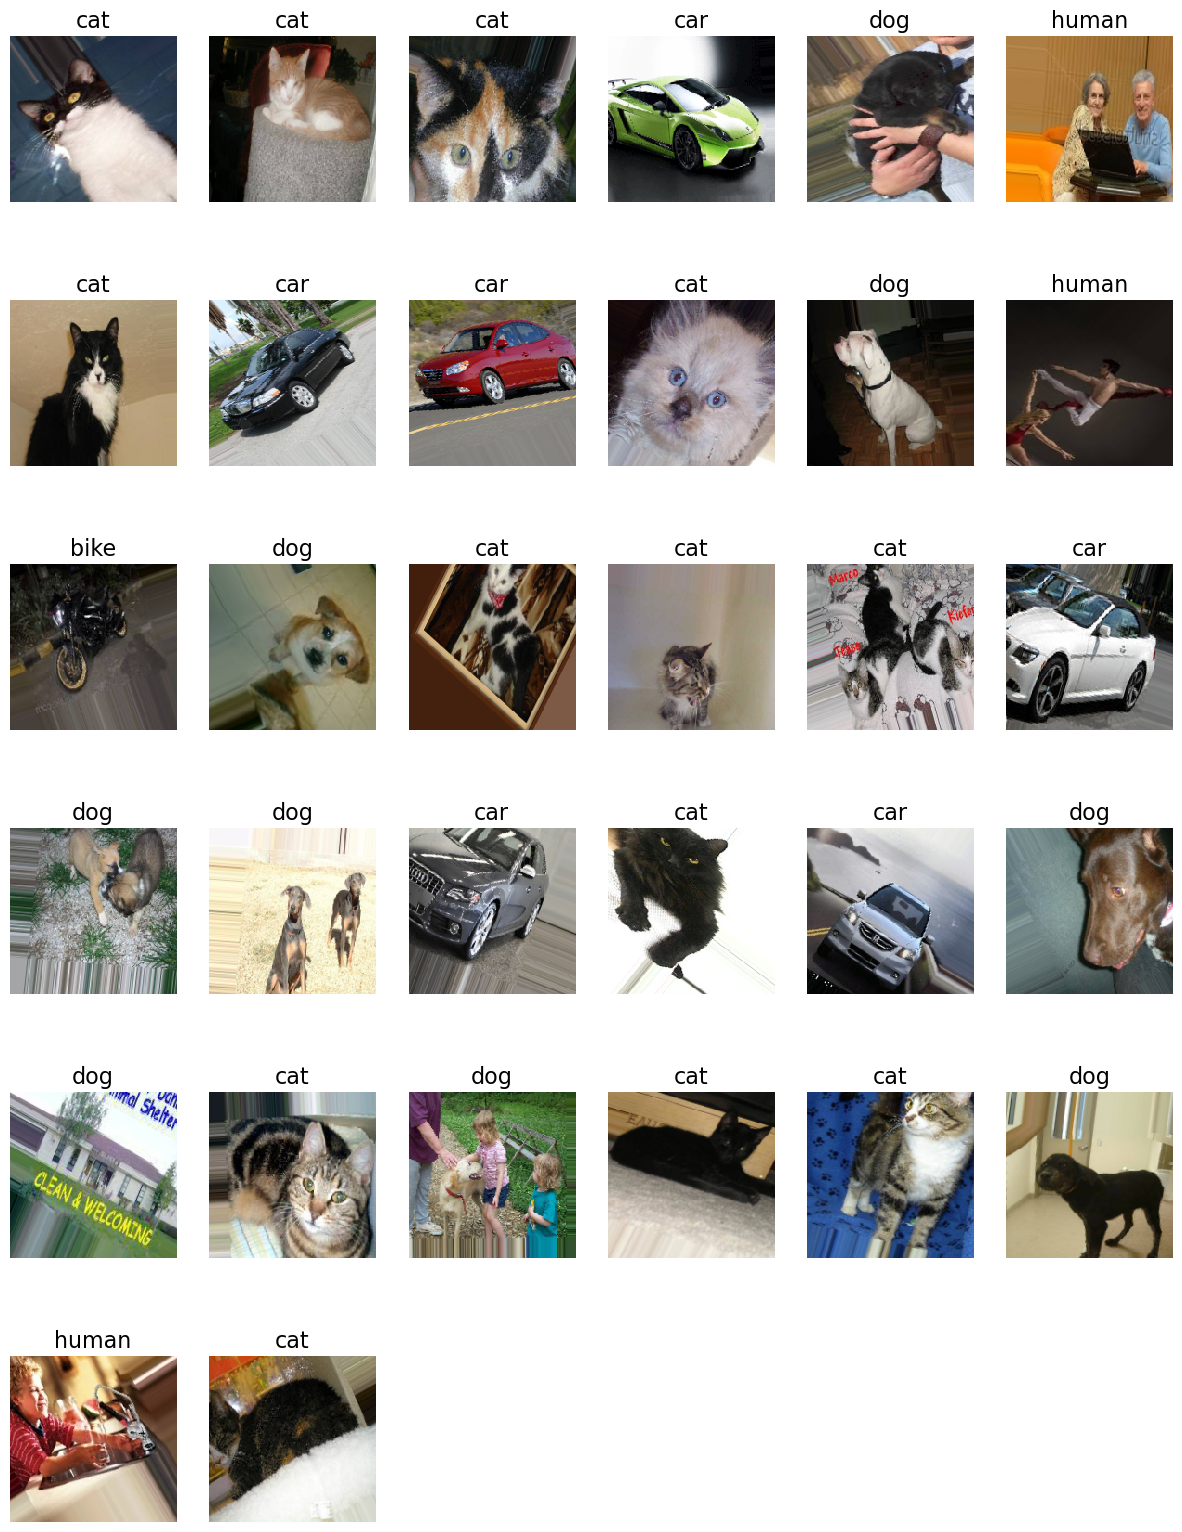

In [20]:
def plots(ims, figsize=(15, 20), rows=6, interp=False, title=None):
    f = plt.figure(figsize=figsize)
    cols = len(ims) // rows if len(ims) % rows == 0 else len(ims) // rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i + 1)
        sp.axis('off')
        if title is not None:
            sp.set_title(class_names[int(title[i])], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

class_names = ['bike', 'car', 'cat', 'dog', 'human']
img, labels = next(train_generator)
plots(img, title=np.argmax(labels, axis=1))  

# CNN Model Architecture

In [21]:
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras import layers
from keras import models, layers

In [22]:
model = models.Sequential()
model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (180,180,3)))
model.add(layers.MaxPool2D(pool_size = (2,2)))
model.add(layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(layers.MaxPool2D(pool_size = (2,2)))
model.add(layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model.add(layers.MaxPool2D(pool_size = (2,2)))
model.add(layers.Conv2D(filters = 256, kernel_size = (3,3), activation = 'relu'))
model.add(layers.MaxPool2D(pool_size = (2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(5, activation = 'softmax'))

# Model Summary

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 20, 20, 128)      

# Compile the model

In [24]:
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

# Training the model

In [25]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs= 30,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

Epoch 1/30
349/349 [==============================] - 542s 2s/step - loss: 1.2172 - accuracy: 0.4434 - val_loss: 1.0114 - val_accuracy: 0.5529
Epoch 2/30
349/349 [==============================] - 376s 1s/step - loss: 1.0394 - accuracy: 0.5343 - val_loss: 0.9222 - val_accuracy: 0.5616
Epoch 3/30
349/349 [==============================] - 382s 1s/step - loss: 0.9407 - accuracy: 0.5729 - val_loss: 0.8061 - val_accuracy: 0.6479
Epoch 4/30
349/349 [==============================] - 347s 993ms/step - loss: 0.8843 - accuracy: 0.6038 - val_loss: 0.7808 - val_accuracy: 0.6825
Epoch 5/30
349/349 [==============================] - 353s 1s/step - loss: 0.8463 - accuracy: 0.6254 - val_loss: 0.8307 - val_accuracy: 0.6321
Epoch 6/30
349/349 [==============================] - 562s 2s/step - loss: 0.8018 - accuracy: 0.6493 - val_loss: 0.7152 - val_accuracy: 0.6991
Epoch 7/30
349/349 [==============================] - 529s 2s/step - loss: 0.7713 - accuracy: 0.6631 - val_loss: 0.6557 - val_accuracy: 0.7

In [26]:
model.save('model.h3')

INFO:tensorflow:Assets written to: model.h3\assets


INFO:tensorflow:Assets written to: model.h3\assets


In [27]:
model = tf.keras.models.load_model('model.h3')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 20, 20, 128)      

# Evaluate and testing the model

In [28]:
test_gen = ImageDataGenerator(rescale = (1./255))

test_generator = test_gen.flow_from_directory(
    test_dir,
    target_size = (180,180),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1397 images belonging to 5 classes.


In [29]:
model.evaluate(test_generator)

44/44 [==============================] - 27s 604ms/step - loss: 0.4237 - accuracy: 0.8218


[0.42370444536209106, 0.821760892868042]

1/1 [==============================] - 0s 34ms/step


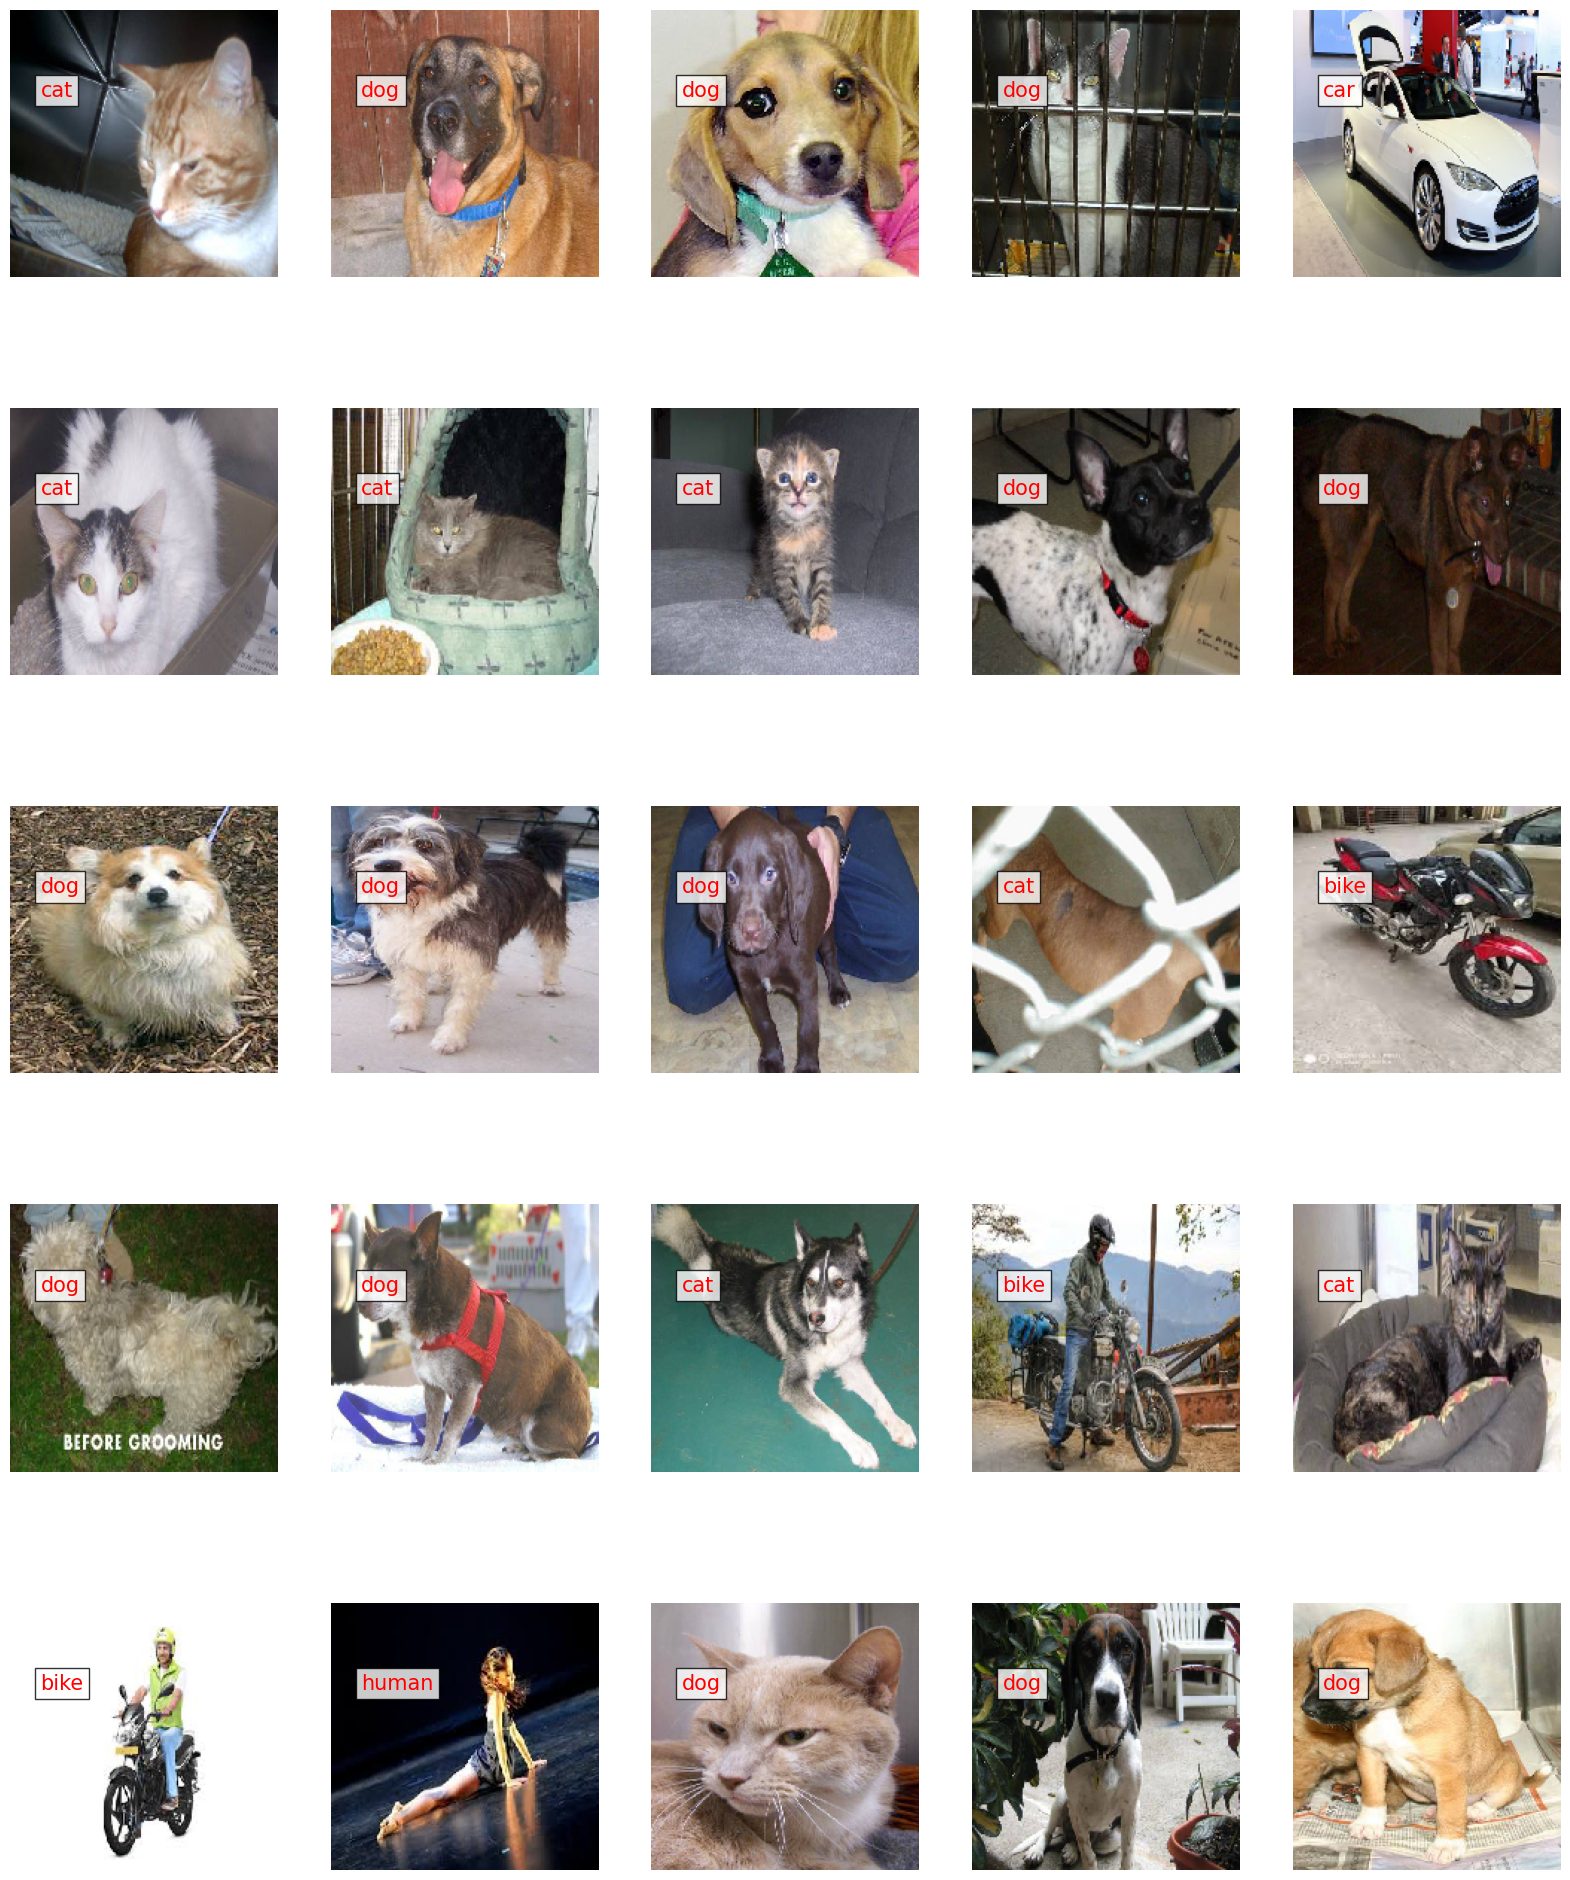

In [33]:
def plot_predictions(imgs, model, class_names, figsize=(20, 25), rows=5, columns=5):
    fig = plt.figure(figsize=figsize)
    for i in range(rows * columns):
        sp = fig.add_subplot(rows, columns, i + 1)
        sp.axis('off')
        img_t = np.expand_dims(imgs[i], axis=0)
        pred = model.predict(img_t)
        
        idx = np.argmax(pred[0])
        
        # Plot
        plt.text(20, 58, class_names[idx], color='red', fontsize=15, bbox=dict(facecolor='white', alpha=0.8))
        plt.imshow(imgs[i])
    
    plt.show()

# Now run the function
imgs, labels = next(test_generator)
plot_predictions(imgs, model, class_names)
